# Question1
Anaysis2

1. Choose several top mail receivers to analyze their email content

1) 

In [29]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.sentiment.vader
import os
import email
from email.parser import Parser
import nltk
import glob
from email.utils import parsedate_tz
import pathlib
import os
from pathlib import Path
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

According to last analysis,list top 5 receivers:
1)richard.shapiro@enron.com
2)jeff.dasovich@enron.com
3)tana.jones@enron.com
4)steven.kean@enron.com
5)sara.shackleton@enron.com



The analysis will focus their inbox mails 



In [84]:
vipfilenamelist=["shapiro-r","dasovich-j","jones-t","kean-s","shackleton-s"]

def vippath(filenamelist):
    vippathlist=[]
    for name in filenamelist:
        vippathlist.append(os.path.dirname(os.getcwd())+"/raw data/maildir/"+name+"/inbox")      
    return vippathlist     
    





In [112]:
vippath(vipfilenamelist)

['/Users/zifuche/Desktop/midterm/raw data/maildir/shapiro-r/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/dasovich-j/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/jones-t/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/kean-s/inbox',
 '/Users/zifuche/Desktop/midterm/raw data/maildir/shackleton-s/inbox']

In [55]:
def getemailcontent(path):                             #get email according path
    with open(path, 'r',encoding='utf-8',errors='ignore') as ex:      
        content = ex.read()
        email=Parser().parsestr(content)
        return(email.get_payload())
    


In [89]:
def getallfile(path):                         #get files path according to dir path
    allfiles=[os.path.join(root,fn) for root,dirs,files in os.walk(path) for fn in files if fn.endswith(".")] 
    return (allfiles)
    
  

In [90]:
def cleanword(rawcontent):
    wordlist=[i for i in word_tokenize(rawcontent.lower()) if i not in stopwords.words('english') and i not in string.punctuation and i.isalpha()]
    return wordlist

In [91]:
def getallemailwordslist(path):
    wordlist=[]
    filespath=getallfile(path)
    for eachfilepath in filespath:
        words=cleanword(getemailcontent(eachfilepath))
        wordlist.extend(words)
    return wordlist    
        
    
    

In [93]:
# name="shapiro-r"
# s=getallemailwordslist(os.path.dirname(os.getcwd())+"/raw data/maildir/"+name+"/sent")


In [94]:
wordbase=[]
for path in vippath(vipfilenamelist):
    wordbase.extend(getallemailwordslist(path))
    

In [154]:
len(wordbase)

850975

In [139]:
wordfreq=sorted(FreqDist(wordbase).items(),key=lambda x:x[1],reverse=True)
wordfreq[:50]

[('enron', 13252),
 ('said', 5871),
 ('company', 5641),
 ('power', 4329),
 ('message', 4060),
 ('would', 3980),
 ('energy', 3936),
 ('sent', 3737),
 ('subject', 3715),
 ('please', 3484),
 ('new', 3446),
 ('http', 3342),
 ('gas', 2736),
 ('jones', 2524),
 ('may', 2396),
 ('pm', 2391),
 ('td', 2276),
 ('business', 2257),
 ('state', 2220),
 ('also', 2187),
 ('credit', 2155),
 ('market', 2092),
 ('one', 2014),
 ('financial', 2005),
 ('billion', 1964),
 ('october', 1949),
 ('information', 1905),
 ('trading', 1901),
 ('dow', 1870),
 ('million', 1867),
 ('agreement', 1843),
 ('us', 1777),
 ('br', 1764),
 ('california', 1732),
 ('could', 1727),
 ('thanks', 1690),
 ('year', 1645),
 ('e', 1629),
 ('last', 1616),
 ('time', 1603),
 ('tr', 1600),
 ('call', 1593),
 ('nbsp', 1591),
 ('font', 1589),
 ('sara', 1579),
 ('jeff', 1575),
 ('know', 1565),
 ('stock', 1538),
 ('cc', 1476),
 ('get', 1473)]

In [107]:
wordbase.count("power")


4329

In [116]:
def cleanword(rawcontent):
    wordlist=[i for i in word_tokenize(rawcontent.lower()) if i not in stopwords.words('english') and i not in string.punctuation]
    return wordlist





In [130]:
def mailquantityofdate(path):                       #mail date
    with open(path, 'r',encoding='utf-8',errors='ignore') as exa:
        content=exa.read()
        email=Parser().parsestr(content)
        t=parsedate_tz(email["date"])
        return (str(t[0])+"-"+str(t[1])) 





In [131]:
emailQuantperMonth=[]
for path in vippath(vipfilenamelist):
    allfiles=getallfile(path)    
    for f in allfiles:
        emailQuantperMonth.append(mailquantityofdate(f))
        
    
    
    

In [132]:
len(emailQuantperMonth)

3526

In [135]:
fd=FreqDist(emailQuantperMonth)
Time = list(fd.keys())
Quantities = list(fd.values())
fd

FreqDist({'2001-10': 1263,
          '2001-11': 937,
          '2001-12': 380,
          '2001-7': 10,
          '2001-8': 6,
          '2001-9': 593,
          '2002-1': 129,
          '2002-2': 101,
          '2002-3': 107})

In [ ]:
import matplotlib.pyplot as pltl
%matplotlib inline

In [ ]:
Time=[1,2,3,4,5,6,7,8,9]
Quantities=[10,6,593,1263,937,380,129,101,107]

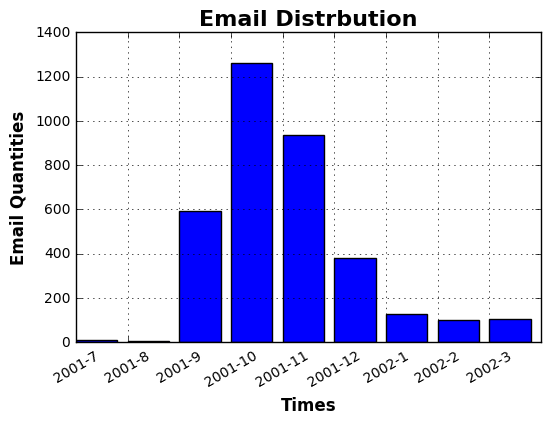

In [156]:
# Show Email Distrubution per Month
# Times=em.keys()
# Quantities=em.values()
my_xticks=['2001-7','2001-8','2001-9','2001-10','2001-11','2001-12','2002-1','2002-2','2002-3']
pltl.bar(Time,Quantities)
pltl.title("Email Distrbution",fontsize=16,fontweight="bold")
pltl.xlabel("Times",fontsize=12,fontweight="bold")
pltl.xticks(Time,my_xticks,rotation=30)
pltl.ylabel("Email Quantities",fontsize=12,fontweight="bold")
pltl.grid(True)
pltl.show()